<a href="https://colab.research.google.com/github/shubhamSonarghare/Food101-Lite/blob/master/Food101_Lite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime
import time
import random
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
plt.rcParams["figure.figsize"] = (20,7)

In [0]:
!unzip -qq "/content/drive/My Drive/SHARED_EE544 /assignment/food101_4class.zip"

In [0]:
!unzip -qq "/content/drive/My Drive/food101_4class.zip"

In [0]:
train_dir = "/content/train/"
test_dir = "/content/test/"
valid_dir = "/content/validation/"

# Image Generator

In [0]:
CLASS_NAMES = os.listdir(train_dir)
train_image_generator = tf.keras.preprocessing.image.ImageDataGenerator()
valid_image_generator = tf.keras.preprocessing.image.ImageDataGenerator()
test_image_generator = tf.keras.preprocessing.image.ImageDataGenerator()


BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224
#STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)

train_data_gen = train_image_generator.flow_from_directory(directory=train_dir,
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     seed=2)
valid_data_gen = valid_image_generator.flow_from_directory(directory=valid_dir,
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=False,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     seed=2)

test_data_gen = test_image_generator.flow_from_directory(directory=test_dir,
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=False,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     seed=2)

Found 4000 images belonging to 4 classes.
Found 2217 images belonging to 4 classes.
Found 2128 images belonging to 4 classes.


In [0]:
print(CLASS_NAMES)

['omelette', 'chicken_curry', 'hamburger', 'waffles']


# Visualizing classes

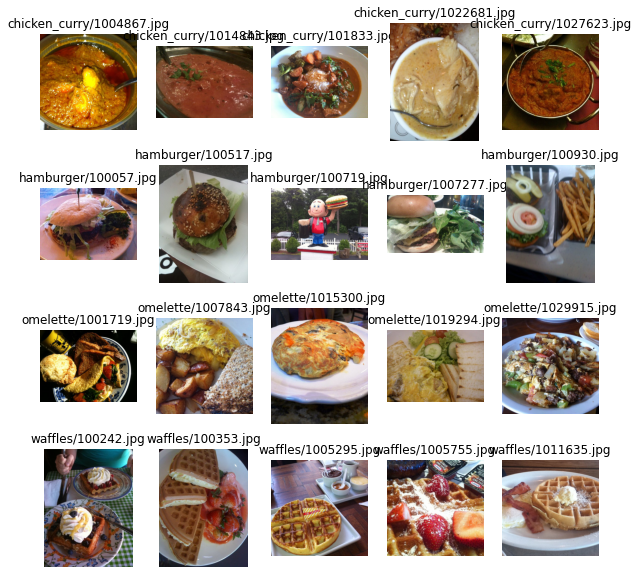

In [0]:
img_name = train_data_gen.filenames
img_class = train_data_gen.classes
fig=plt.figure(figsize=(10,10))
columns = 5
rows = 4

cnt0=0
cnt1=0
cnt2=0
cnt3=0

img_to_show=[]
for i in range(len(img_class)):
  label = img_class[i]
  if label == 0 and cnt0<5:
    img_to_show.append(img_name[i])
    cnt0+=1
  if label == 1 and cnt1<5:
    img_to_show.append(img_name[i])
    cnt1+=1
  if label == 2 and cnt2<5:
    img_to_show.append(img_name[i])
    cnt2+=1
  if label == 3 and cnt3<5:
    img_to_show.append(img_name[i])
    cnt3+=1


for i in range(1, columns*rows +1):
    img = plt.imread(train_dir+img_to_show[i-1])
    fig.add_subplot(rows, columns, i)
    plt.title(img_to_show[i-1])
    plt.axis('off')
    plt.imshow(img)
    
plt.show()

#Supporting functions

In [0]:
def visualize(history, epochs):
  fig = plt.figure()
  
  plt.subplot(1,2,1)
  plt.plot(history.history['accuracy']);
  plt.plot(history.history['val_accuracy'])
  plt.title("Model Accuracy")
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  label_a = "{:.2f}".format(history.history['accuracy'][-1])
  label_b = "{:.2f}".format(history.history['val_accuracy'][-1])
  plt.annotate(label_a, (epochs-1,history.history['accuracy'][-1]), textcoords="offset points", 
               xytext=(0,10),ha='center')
  plt.annotate(label_b, (epochs-1,history.history['val_accuracy'][-1]), textcoords="offset points", 
               xytext=(0,10),ha='center')
  plt.legend(['train', 'Validation'], loc='upper left')

  plt.subplot(1,2,2)
  plt.plot(history.history['loss']);
  plt.plot(history.history['val_loss'])
  plt.title("Model Loss")
  plt.ylabel('loss')
  plt.xlabel('epoch')
  label_c = "{:.2f}".format(history.history['loss'][-1])
  label_d = "{:.2f}".format(history.history['val_loss'][-1])
  plt.annotate(label_c, (epochs-1,history.history['loss'][-1]), textcoords="offset points", 
               xytext=(0,10),ha='center')
  plt.annotate(label_d, (epochs-1,history.history['val_loss'][-1]), textcoords="offset points", 
               xytext=(0,10),ha='center')
  plt.legend(['train', 'Validation'], loc='upper left')

  plt.show()

def print_classification_report(model, data_gen, batch_size):
  true_labels = data_gen.labels
  data_gen.reset()
  predicted_labels = model.predict(data_gen, steps = np.ceil(len(true_labels)/batch_size))
  #print(list( np.argmax(a) for a in predicted_labels), true_labels)
  print(classification_report(true_labels, list( np.argmax(a) for a in predicted_labels)))
  print("Confusion Matrix:\n ",confusion_matrix(true_labels,list( np.argmax(a) for a in predicted_labels)))

def save_custom_model(model,chk_pt_name,name=''):
  model.load_weights(chk_pt_name);
  #loss, acc = save_model.evaluate(valid_data_gen, steps=steps);
  model.save('resnet'+time.time()+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")+'.h5')
  return model;

# Download Resent50

In [0]:
resnet = tf.keras.applications.ResNet50(include_top=False, weights='imagenet', input_shape=(IMG_HEIGHT, IMG_WIDTH,3))

94773248/94765736 [==============================] - 2s 0us/step


## Freezing required layers and keeping res5c unfreezed

In [0]:
resnet.trainable = True
for layer in resnet.layers:
  if "conv5_block3_" in layer.name:
    layer.trainable = True
  else:
    layer.trainable = False


In [0]:
for layer in resnet.layers:
  print(layer, layer.trainable)


<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fb8fa44e940> False
<tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x7fb8f97ee208> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fb8f97ee240> False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7fb8f97ee898> False
<tensorflow.python.keras.layers.core.Activation object at 0x7fb8f91f2f98> False
<tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x7fb8fa437cf8> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fb8f90e85c0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fb8f90f24a8> False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7fb8f9117fd0> False
<tensorflow.python.keras.layers.core.Activation object at 0x7fb8f911eef0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fb8f911e6a0> False
<tensorflow.python.keras.laye

## Building Model

In [0]:

flatten = tf.keras.layers.Flatten()
prediction_layer = tf.keras.layers.Dense(len(CLASS_NAMES), activation='softmax')
trans_model = tf.keras.Sequential([resnet,
                                flatten,
                                tf.keras.layers.Dense(256, activation='relu', kernel_initializer='glorot_uniform' ),
                                tf.keras.layers.Dropout(0.4),
                                prediction_layer])
trans_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               25690368  
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 4)                 1028      
Total params: 49,279,108
Trainable params: 30,157,060
Non-trainable params: 19,122,048
_________________________________________________________________


## Training Model

In [0]:
NUM_OF_EPOCHS = 30

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               25690368  
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 4)                 1028      
Total params: 49,279,108
Trainable params: 30,157,060
Non-trainable params: 19,122,048
_________________________________________________________________
Epoch 1/30
125/125 [==============================] - ETA: 0s - loss: 2.9489 - accuracy: 0.7140
Epoch

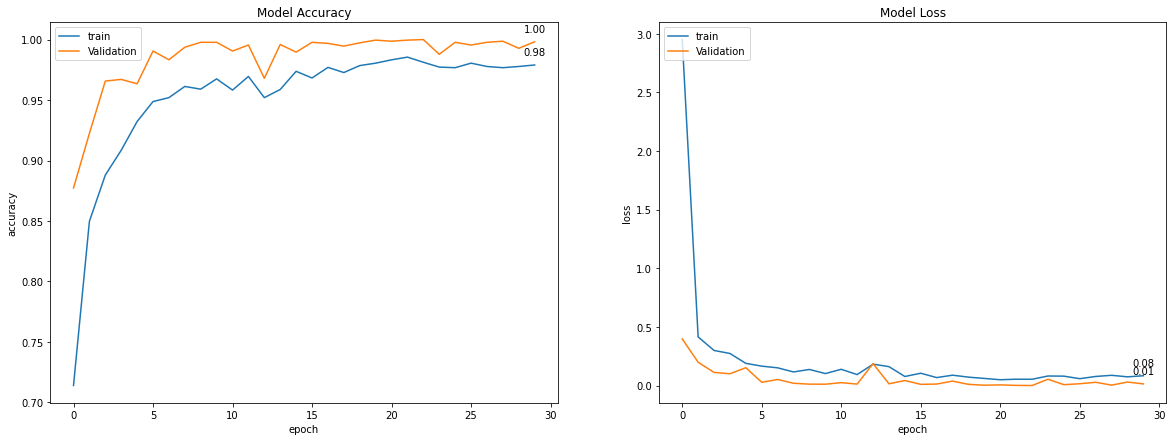

In [0]:
trans_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy',metrics=['accuracy'])

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath='/content/resnet/model_1.ckpt',
                                                 save_weights_only=True,
                                                 verbose=1, 
                                                 save_best_only=True, 
                                                 monitor='val_accuracy')

trans_model.summary()

train_data_gen.reset()
#train_data_gen_with_augmentation.reset()
valid_data_gen.reset()
t0 = time.time()
hist = trans_model.fit(train_data_gen, 
                       epochs=NUM_OF_EPOCHS, 
                       steps_per_epoch=np.ceil(4000/BATCH_SIZE), 
                       validation_data=valid_data_gen, 
                       validation_steps=np.ceil(2217/BATCH_SIZE) , 
                       callbacks=[cp_callback])

t_end = time.time()
print("Training took ", t_end-t0, " sec")
trans_model.save('resnet_baseline_'+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")+'.h5')
visualize(hist, NUM_OF_EPOCHS)


## Saving Model

In [0]:
!mv *.h5 "/content/drive/My Drive/My_EE544/Part-2/h5_models/"

In [0]:
!cp -r resnet* "/content/drive/My Drive/My_EE544/Part-2/"

In [0]:
load_model  = tf.keras.models.load_model('/content/drive/My Drive/My_EE544/Part-2/h5_models/resnet_baseline_20200414-130114.h5')

## Classification Reports

In [0]:
valid_data_gen.reset()
print("Classification Report for Transfer learning on Validation set:")
print_classification_report(load_model, valid_data_gen, BATCH_SIZE)
test_data_gen.reset()
print("Classification Report for Transfer learning on Test set:")
print_classification_report(load_model, test_data_gen, BATCH_SIZE)

Classification Report for Transfer learning on Validation set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       569
           1       1.00      1.00      1.00       541
           2       1.00      1.00      1.00       577
           3       1.00      1.00      1.00       530

    accuracy                           1.00      2217
   macro avg       1.00      1.00      1.00      2217
weighted avg       1.00      1.00      1.00      2217

Confusion Matrix:
  [[567   0   2   0]
 [  0 541   0   0]
 [  0   0 577   0]
 [  0   2   0 528]]
Classification Report for Transfer learning on Test set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       552
           1       1.00      1.00      1.00       534
           2       1.00      1.00      1.00       518
           3       1.00      1.00      1.00       524

    accuracy                           1.00      2128
   macro avg       1.0

# With Data Augmentation

In [0]:
image_generator_with_augmentation = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
                                                                                    horizontal_flip=True,
                                                                                    width_shift_range=0.1,
                                                                                    height_shift_range = 0.1,
                                                                                    shear_range = 0.2,
                                                                                    zoom_range = 0.2,
                                                                                    fill_mode='nearest')
                                                                                    #rescale=1./255)

train_data_gen_with_augmentation = image_generator_with_augmentation.flow_from_directory(directory=train_dir,
                                                                       batch_size=BATCH_SIZE,
                                                                       shuffle=True,
                                                                       target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                                       seed=1)

Found 4000 images belonging to 4 classes.


In [0]:
resnet.trainable = True
#resnet.summary()
res_model = resnet

In [0]:
for layer in res_model.layers:
    if "conv5_block3_" in layer.name:
      layer.trainable = True
    else:
      layer.trainable = False

In [0]:
for layer in res_model.layers:
  print(layer, layer.trainable, layer.name  )

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fb8fa44e940> False input_1
<tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x7fb8f97ee208> False conv1_pad
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fb8f97ee240> False conv1_conv
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7fb8f97ee898> False conv1_bn
<tensorflow.python.keras.layers.core.Activation object at 0x7fb8f91f2f98> False conv1_relu
<tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x7fb8fa437cf8> False pool1_pad
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fb8f90e85c0> False pool1_pool
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fb8f90f24a8> False conv2_block1_1_conv
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7fb8f9117fd0> False conv2_block1_1_bn
<tensorflow.python.keras.layers.core.Activation object at 0x7fb8f911eef0> False conv2_

## Training with DAug

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten_2 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               25690368  
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 1028      
Total params: 49,279,108
Trainable params: 30,157,060
Non-trainable params: 19,122,048
_________________________________________________________________
Epoch 1/30
125/125 [==============================] - ETA: 0s - loss: 2.3434 - accuracy: 0.7947
Epo

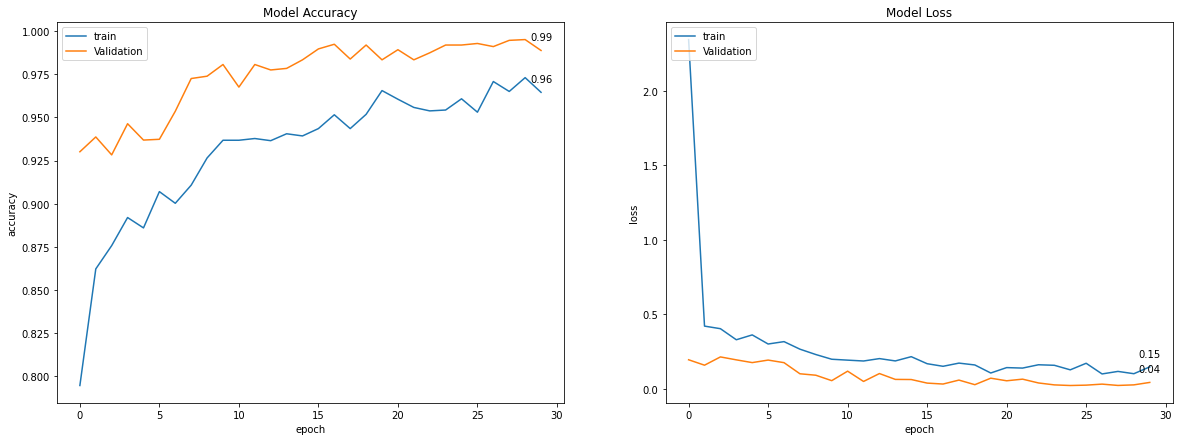

In [0]:
flatten = tf.keras.layers.Flatten()
prediction_layer = tf.keras.layers.Dense(len(CLASS_NAMES), activation='softmax')
trans_model_DA = tf.keras.Sequential([res_model,
                                       flatten,
                                       tf.keras.layers.Dense(256, activation='relu', kernel_initializer='glorot_uniform' ),
                                       tf.keras.layers.Dropout(0.4),
                                       prediction_layer])
#trans_model_new.summary()
NUM_OF_EPOCHS = 30

trans_model_DA.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy',metrics=['accuracy'])

trans_model_DA.summary()

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath='/content/resnet_DAug/model_1.ckpt',
                                                 save_weights_only=True,
                                                 verbose=1, 
                                                 save_best_only=True, 
                                                 monitor='val_accuracy')
#train_data_gen.reset()
train_data_gen_with_augmentation.reset()
valid_data_gen.reset()
t0 = time.time()
hist = trans_model_DA.fit(train_data_gen_with_augmentation, 
                       epochs=NUM_OF_EPOCHS, 
                       steps_per_epoch=np.ceil(4000/BATCH_SIZE), 
                       validation_data=valid_data_gen, 
                       validation_steps=np.ceil(2217/BATCH_SIZE) , 
                       callbacks=[cp_callback])

t_end = time.time()
print("Training took ", t_end-t0, " sec")
trans_model_DA.save('resnet_with_DA_on_baseline_'+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")+'.h5')

visualize(hist, NUM_OF_EPOCHS)



In [0]:
!mv *.h5 "/content/drive/My Drive/My_EE544/Part-2/h5_models/"

In [0]:
!cp -r /content/resnet_DAug/ "/content/drive/My Drive/My_EE544/Part-2/"

## Classification Reports

In [0]:
load_model_DA  = tf.keras.models.load_model('/content/drive/My Drive/My_EE544/Part-2/h5_models/resnet_with_DA_on_baseline_20200414-134929.h5')
valid_data_gen.reset()
print("Classification Report for Transfer learning with Data Augmentation on Validation set:")
print_classification_report(load_model_DA, valid_data_gen, BATCH_SIZE)
test_data_gen.reset()
print("Classification Report for Transfer learning with Data Augmentation on Test set:")
print_classification_report(load_model_DA, test_data_gen, BATCH_SIZE)

Classification Report for Transfer learning with Data Augmentation on Validation set:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       569
           1       0.99      0.99      0.99       541
           2       0.99      0.98      0.99       577
           3       1.00      0.99      0.99       530

    accuracy                           0.99      2217
   macro avg       0.99      0.99      0.99      2217
weighted avg       0.99      0.99      0.99      2217

Confusion Matrix:
  [[566   0   2   1]
 [  3 536   1   1]
 [  9   2 566   0]
 [  0   5   1 524]]
Classification Report for Transfer learning with Data Augmentation on Test set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       552
           1       0.99      1.00      0.99       534
           2       0.99      0.99      0.99       518
           3       0.99      0.99      0.99       524

    accuracy                  

# Finding Uniqueness in train, validation & test split

'\nfor i in range(len(CLASS_NAMES)):    \n  figure.add_subplot(4,3,odds[i]+2)\n  img = plt.imread(valid_dir+CLASS_NAMES[i]+"/"+img_names[i])\n  plt.title(\'training set img\')\n  plt.axis(\'off\')\n  plt.imshow(img)'

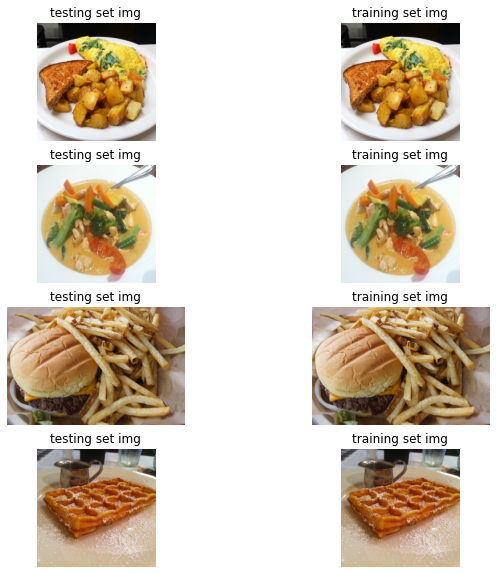

In [0]:
img_names=[]
odds=[1,3,5,7]
figure = plt.figure( figsize=(10,10))
for i in range(len(CLASS_NAMES)):
  dir_tr = test_dir+ CLASS_NAMES[i]+"/"
  figure.add_subplot(4,2,odds[i])
  imgs = os.listdir(dir_tr)
  random_img_num = random.sample(range(len(imgs)), 1)
  for j in random_img_num:
    img_names.append(imgs[j])
    img = plt.imread(dir_tr + imgs[j])
    plt.title('testing set img')
    plt.axis('off')
    plt.imshow(img)

for i in range(len(CLASS_NAMES)):    
  figure.add_subplot(4,2,odds[i]+1)
  img = plt.imread(train_dir+CLASS_NAMES[i]+"/"+img_names[i])
  plt.title('training set img')
  plt.axis('off')
  plt.imshow(img)
'''
for i in range(len(CLASS_NAMES)):    
  figure.add_subplot(4,3,odds[i]+2)
  img = plt.imread(valid_dir+CLASS_NAMES[i]+"/"+img_names[i])
  plt.title('training set img')
  plt.axis('off')
  plt.imshow(img)'''

In [0]:
valid_img = valid_data_gen.filenames
test_img = test_data_gen.filenames
train_img = train_data_gen.filenames

com_train_valid = list(set(valid_img).intersection(train_img))
print("Total common imgs between train and validation: ",len(com_train_valid))
print("total imgs in Validation: ", len(valid_img))

com_train_test = list(set(test_img).intersection(train_img))
print("Total common imgs between train and test: ",len(com_train_test))
print("total imgs in test: ", len(test_img))

Total common imgs between train and validation:  2217
total imgs in Validation:  2217
Total common imgs between train and test:  2128
total imgs in test:  2128


In [0]:
valid_img = valid_data_gen.filenames
print(valid_img)
print(valid_data_gen.classes)

['chicken_curry/1014843.jpg', 'chicken_curry/101833.jpg', 'chicken_curry/102896.jpg', 'chicken_curry/10340.jpg', 'chicken_curry/1035626.jpg', 'chicken_curry/1048226.jpg', 'chicken_curry/104874.jpg', 'chicken_curry/105113.jpg', 'chicken_curry/1068592.jpg', 'chicken_curry/1075859.jpg', 'chicken_curry/1076489.jpg', 'chicken_curry/108559.jpg', 'chicken_curry/1095245.jpg', 'chicken_curry/11207.jpg', 'chicken_curry/1125163.jpg', 'chicken_curry/1134602.jpg', 'chicken_curry/1147753.jpg', 'chicken_curry/1149623.jpg', 'chicken_curry/115224.jpg', 'chicken_curry/116147.jpg', 'chicken_curry/1165404.jpg', 'chicken_curry/118163.jpg', 'chicken_curry/118944.jpg', 'chicken_curry/1208906.jpg', 'chicken_curry/1213873.jpg', 'chicken_curry/1215399.jpg', 'chicken_curry/1225331.jpg', 'chicken_curry/1234505.jpg', 'chicken_curry/1236329.jpg', 'chicken_curry/1237705.jpg', 'chicken_curry/1240973.jpg', 'chicken_curry/1248926.jpg', 'chicken_curry/124904.jpg', 'chicken_curry/1254768.jpg', 'chicken_curry/1278457.jpg'

In [0]:
restored_model = tf.keras.models.load_model("/content/drive/My Drive/My_EE544/Part-2/h5_models/resnet_smoothest_till_04-10-2020_10:56am.h5")

# Creating Validation split from training data

In [0]:
image_generator_with_augmentation_new = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
                                                                                    horizontal_flip=True,
                                                                                    width_shift_range=0.1,
                                                                                    height_shift_range = 0.1,
                                                                                    shear_range = 0.2,
                                                                                    zoom_range = 0.2,
                                                                                    validation_split=0.2,
                                                                                    fill_mode = 'nearest')
                                                                                    #rescale=1./255)
'''image_generator_with_augmentation_new = tf.keras.preprocessing.image.ImageDataGenerator(
                                                                                    validation_split=0.2,
                                                                                    rescale=1./255)'''

train_data_gen_new = image_generator_with_augmentation_new.flow_from_directory(directory=train_dir,
                                                                       batch_size=BATCH_SIZE,
                                                                       shuffle=True,
                                                                       target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                                       subset="training",
                                                                       class_mode='categorical',
                                                                       seed=1)

valid_data_gen_new = image_generator_with_augmentation_new.flow_from_directory(directory=train_dir,
                                                                       batch_size=BATCH_SIZE,
                                                                       shuffle=False,
                                                                       target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                                       subset="validation",
                                                                       class_mode='categorical')

Found 3200 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


In [0]:
train_img = train_data_gen_new.filenames
valid_img = valid_data_gen_new.filenames


com_train_valid = list(set(valid_img).intersection(train_img))
print("Total common imgs between train and validation: ",len(com_train_valid))
print("total imgs in Validation: ", len(valid_img))



Total common imgs between train and validation:  0
total imgs in Validation:  800


## Model-3

In [0]:
resnet.trainable = True
for layer in resnet.layers:
  if "conv5_block3_" in layer.name:
    layer.trainable = True
  else:
    layer.trainable = False


In [0]:
flatten = tf.keras.layers.Flatten()
prediction_layer = tf.keras.layers.Dense(len(CLASS_NAMES), activation='softmax')
trans_model_3 = tf.keras.Sequential([resnet,
                                flatten,
                                tf.keras.layers.Dense(256, activation='relu', kernel_initializer='glorot_uniform' ),
                                tf.keras.layers.Dropout(0.4),
                                prediction_layer])
trans_model_3.summary()


'''global_average_layer = tf.keras.layers.GlobalAveragePooling2D(input_shape=(7, 7, 2048))
trans_model_2 = tf.keras.Sequential([resnet,
                                global_average_layer,
                                prediction_layer])
'''
'''############ Without Augmentation ##############
op_layer = resnet.output
#op_layer = tf.keras.layers.AveragePooling2D(pool_size=(2,2))(op_layer)
#op_layer = tf.keras.layers.Dropout(0.4)(op_layer)
op_layer = tf.keras.layers.Flatten()(op_layer)
#op_layer = tf.keras.layers.GlobalAveragePooling2D()(op_layer)
#op_layer = tf.keras.layers.BatchNormalization()(op_layer)
#op_layer = tf.keras.layers.Dropout(0.5)(op_layer)
op_layer = tf.keras.layers.Dense(512, activation='relu')(op_layer)
op_layer = tf.keras.layers.BatchNormalization()(op_layer)
op_layer = tf.keras.layers.Dropout(0.4)(op_layer)
op_layer = tf.keras.layers.Dense(128, activation='relu')(op_layer)
op_layer = tf.keras.layers.BatchNormalization()(op_layer)
op_layer = tf.keras.layers.Dropout(0.4)(op_layer)
op_layer = tf.keras.layers.Dense(len(CLASS_NAMES),activation='softmax',)(op_layer)
#print(op_layer)
#
trans_model_3 = tf.keras.Model(inputs=resnet.input, outputs=op_layer )

trans_model_3.summary()'''
'''
trans_model_2 = tf.keras.Sequential()
#trans_model_2.add(res_model)
#trans_model_2.add(resnet)
#trans_model_2.add(tf.keras.layers.Flatten())
#trans_model_2.add(tf.keras.layers.Dropout(0.5))
trans_model_2.add(tf.keras.layers.Dense(512, activation='relu'))
trans_model_2.add(tf.keras.layers.BatchNormalization())
trans_model_2.add(tf.keras.layers.Dropout(0.5))
trans_model_2.add(tf.keras.layers.Dense(len(CLASS_NAMES),activation='softmax'))

trans_model_2.summary()'''

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten_4 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               25690368  
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 1028      
Total params: 49,279,108
Trainable params: 30,157,060
Non-trainable params: 19,122,048
_________________________________________________________________


"\ntrans_model_2 = tf.keras.Sequential()\n#trans_model_2.add(res_model)\n#trans_model_2.add(resnet)\n#trans_model_2.add(tf.keras.layers.Flatten())\n#trans_model_2.add(tf.keras.layers.Dropout(0.5))\ntrans_model_2.add(tf.keras.layers.Dense(512, activation='relu'))\ntrans_model_2.add(tf.keras.layers.BatchNormalization())\ntrans_model_2.add(tf.keras.layers.Dropout(0.5))\ntrans_model_2.add(tf.keras.layers.Dense(len(CLASS_NAMES),activation='softmax'))\n\ntrans_model_2.summary()"

## Training Model-3

In [0]:
NUM_OF_EPOCHS = 30

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten_4 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               25690368  
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 1028      
Total params: 49,279,108
Trainable params: 30,157,060
Non-trainable params: 19,122,048
_________________________________________________________________
Epoch 1/30
150/150 [==============================] - ETA: 0s - loss: 1.3373 - accuracy: 0.9375
Epo

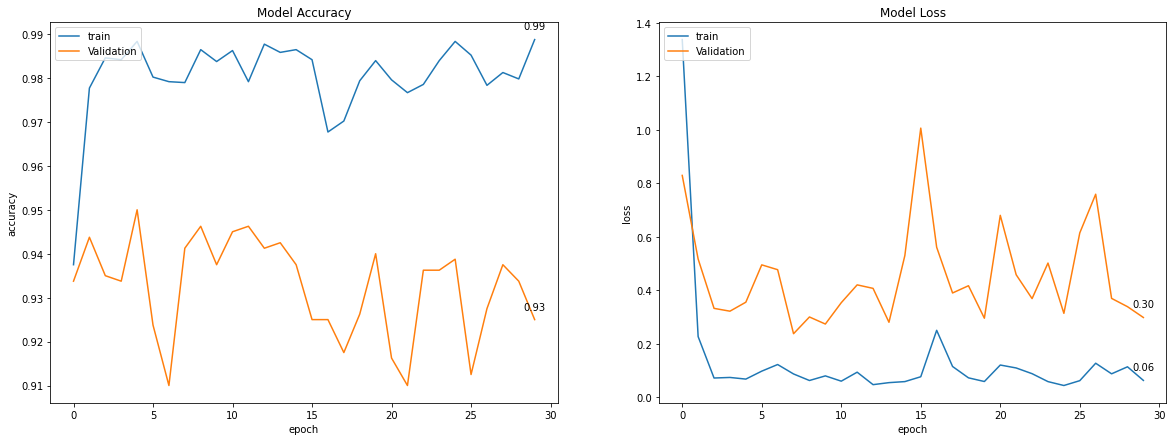

In [0]:
trans_model_3.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy',metrics=['accuracy'])
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath='/content/resnet_3/model_1.ckpt',
                                                 save_weights_only=True,
                                                 verbose=1, 
                                                 save_best_only=True, 
                                                 monitor='val_accuracy')
trans_model_3.summary()
train_data_gen_new.reset()

valid_data_gen_new.reset()
t0 = time.time()
hist = trans_model_3.fit(train_data_gen_new, 
                       epochs=NUM_OF_EPOCHS, 
                       steps_per_epoch=np.ceil(3200/BATCH_SIZE)+50, 
                       validation_data=valid_data_gen_new, 
                       validation_steps=np.ceil(800/BATCH_SIZE) , 
                       callbacks=[cp_callback])

t_end = time.time()
print("Training took ", t_end-t0, " sec")
trans_model_3.save('resnet_3_different_split_'+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")+'.h5')
visualize(hist, NUM_OF_EPOCHS)

In [0]:
!mv *.h5 "/content/drive/My Drive/My_EE544/Part-2/h5_models/"

In [0]:
!cp -r resnet_3* "/content/drive/My Drive/My_EE544/Part-2/"
#!cp *.h5 "/content/drive/My Drive/My_EE544/Part-2/h5_models/"

# Testing Models on out-of-the-dataset images

In [0]:
import glob

In [0]:
!mv *.jpg /content/OFD\ images/

In [0]:
#!rm /content/OFD\ images/*

In [0]:
!unzip -qq /content/New_images.zip

In [0]:
new_image_generator = tf.keras.preprocessing.image.ImageDataGenerator()
new_data_gen = new_image_generator.flow_from_directory(directory="/content/New_images/",
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=False,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     interpolation='nearest')

Found 20 images belonging to 4 classes.


In [0]:
resnet_wo_DA = tf.keras.models.load_model('/content/drive/My Drive/My_EE544/Part-2/h5_models/resnet_baseline_20200414-130114.h5');
resent_w_DA = tf.keras.models.load_model('/content/drive/My Drive/My_EE544/Part-2/h5_models/resnet_with_DA_on_baseline_20200414-134929.h5')
resnet_nw_split = tf.keras.models.load_model('/content/drive/My Drive/My_EE544/Part-2/h5_models/resnet_3_different_split_20200414-164528_latest.h5')

In [0]:
new_data_gen.reset()
print("Classification Report for Transfer learning without Data Augmentation on new Images:")
print_classification_report(resnet_wo_DA, new_data_gen, BATCH_SIZE)
new_data_gen.reset()
print("Classification Report for Transfer learning with Data Augmentation on new Images:")
print_classification_report(resent_w_DA, new_data_gen, BATCH_SIZE)
new_data_gen.reset()
print("Classification Report for Transfer learning with Data Augmentation and New Split on new Images:")
print_classification_report(resnet_nw_split, new_data_gen, BATCH_SIZE)

Classification Report for Transfer learning without Data Augmentation on new Images:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.71      1.00      0.83         5
           2       0.80      0.80      0.80         5
           3       1.00      0.60      0.75         5

    accuracy                           0.80        20
   macro avg       0.83      0.80      0.80        20
weighted avg       0.83      0.80      0.80        20

Confusion Matrix:
  [[4 0 1 0]
 [0 5 0 0]
 [0 1 4 0]
 [1 1 0 3]]
Classification Report for Transfer learning with Data Augmentation on new Images:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5
           3       1.00      0.80      0.89         5

    accuracy                           0.90        20
   macr

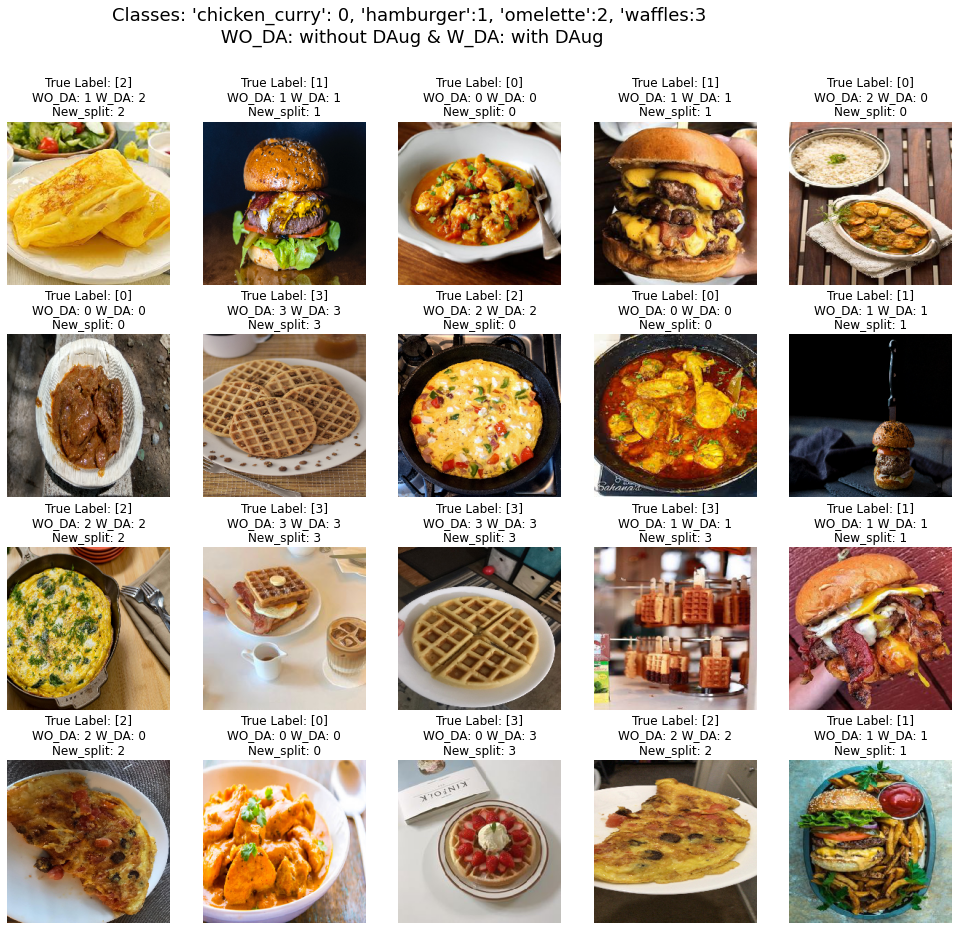

In [0]:
#fig = plt.figure()
#img = plt.imread("/content/OFD images/waffles_2.jpg")
#plt.imshow(img)
#print(img.shape)

file_lst = glob.glob("/content/OFD images/*.jpg")
#print(len(file_lst))
fig=plt.figure(figsize=(15,15))
plt.suptitle("Classes: 'chicken_curry': 0, 'hamburger':1, 'omelette':2, 'waffles:3 \n WO_DA: without DAug & W_DA: with DAug ",fontsize=18)
plt.subplots_adjust(right=1.0)
c_name = ['chicken_curry', 'hamburger','omelette', 'waffles']
for file in range(len(file_lst)):
  #print(file_lst[file])
  #img = plt.imread("/content/OFD images/"+file_lst[file])
  img = plt.imread(file_lst[file])
  #for i in range(len(CLASS_NAMES)):
   # print(CLASS_NAMES[i], CLASS_NAMES[i] in file_lst[file])
  true_lab = [i for i in range(len(c_name)) if c_name[i] in file_lst[file] ]
  img = tf.image.resize(img,(224,224), method='nearest')
  img_p = np.expand_dims(img, axis=0)
  predictn_wo_DA = resnet_wo_DA.predict(img_p,batch_size=1)
  predictn_w_DA = resent_w_DA.predict(img_p,batch_size=1)
  predictn_nw = resnet_nw_split.predict(img_p,batch_size=1)
  fig.add_subplot(4, 5, file+1)
  plt.title( "True Label: " + str(true_lab)+"\nWO_DA: " + str(np.argmax(predictn_wo_DA))+ " W_DA: " + str(np.argmax(predictn_w_DA)) +"\nNew_split: "+ str(np.argmax(predictn_nw)) )
  plt.axis('off')
  plt.imshow(img)
#print("Prediction without DA: ",predictn_wo_DA, " Class: " , CLASS_NAMES[np.argmax(predictn_wo_DA)])
#print("Prediction with DA: ",predictn_w_DA, " Class: " , CLASS_NAMES[np.argmax(predictn_w_DA)])


In [0]:
md = tf.keras.models.load_model('/content/drive/My Drive/EE544_ASSIGMENT-1/Part-2/h5_models/resnet_baseline_20200414-130114.h5')
valid_data_gen.reset()
print_classification_report(md, valid_data_gen, BATCH_SIZE)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       569
           1       1.00      1.00      1.00       541
           2       1.00      1.00      1.00       577
           3       1.00      1.00      1.00       530

    accuracy                           1.00      2217
   macro avg       1.00      1.00      1.00      2217
weighted avg       1.00      1.00      1.00      2217

Confusion Matrix:
  [[567   0   2   0]
 [  0 541   0   0]
 [  0   0 577   0]
 [  0   2   0 528]]
